## Since the data set is bigger one and i use Google colab to process that data . 
- To get access the access of data directely  is bit tedious  task so i do what ,  
- Upload the both train and test file to my Google Drive then try to access that data.

### Work on data which stored on google Drive



This model inspired from  Github KamalChhirang
[Github Notebook](https://github.com/KamalChhirang/Data-Science-Club-Mahindra-Hackathon/blob/master/LightgbmAndCatBoostModel.py)

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew

from datetime import date
%matplotlib inline

## Explain the feature set.

In [3]:
from google.colab import files
files.upload()

Saving Data_Dictionary.xlsx to Data_Dictionary.xlsx


{'Data_Dictionary.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00B;>\xc9Y\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [0]:
var=pd.read_excel('Data_Dictionary.xlsx')

In [5]:
var

,Variable,Description
0,reservation_id,Reservation ID
1,booking_date,Date of booking
2,checkin_date,Checkin date recorded at the time of booking
3,checkout_date,Checkout date recorded at the time of booking
4,channel_code,Different channels of booking
5,main_product_code,Type of product a member has purchased
6,numberofadults,Number of adults travelling
7,numberofchildren,Number of children travelling
8,persontravellingid,Type of person travelling
9,resort_region_code,Resort Region


# Train

In [0]:
with open('/content/drive/My Drive/train.csv', 'r') as file:
  data_train=pd.read_csv(file)

In [0]:
data_train.to_csv('train.csv')

# Test

In [0]:
with open('/content/drive/My Drive/test.csv', 'r') as file:
  data_test=pd.read_csv(file)

In [0]:
data_test.to_csv('test.csv')

## Lets read out the both saved file train and test csv

In [0]:
train=pd.read_csv('train.csv')

In [0]:
test=pd.read_csv('test.csv')

In [12]:
train.head()

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [13]:
test.head()

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [14]:
train['reservation_id'].nunique()

341424

In [15]:
test['reservation_id'].nunique()

146765

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 25 columns):
Unnamed: 0                            341424 non-null int64
reservation_id                        341424 non-null object
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 

Here we see the column of all dates **('booking_date','checkin_date','checkout_date')** are "Object".
- So lets first convert these columns in to proper date time formate because we gonna extract new features out of them.

In [17]:
train.shape

(341424, 25)

In [18]:
test.shape

(146765, 24)

In [0]:
# Create a function.
def extractDateTimeFeature(date_column,data):
    data[date_column+"_year"]=data[date_column].dt.year
    data[date_column+"_day"]=data[date_column].dt.day
    data[date_column+"_month"]=data[date_column].dt.month
    data[date_column+"_dayofweek"]=data[date_column].dt.dayofweek
    data[date_column+"_isweekend"]=data[date_column+"_dayofweek"].apply(lambda x:1 if x==5 or x==6 else 0)
    # the weekend feature which hold a lot importance because more people like to go out during weekend time.
    return data

In [0]:
date_columns=['booking_date','checkin_date','checkout_date']
for col in date_columns:
    train[col]=pd.to_datetime(train[col],dayfirst=True)
    test[col]=pd.to_datetime(test[col],dayfirst=True)
    train=extractDateTimeFeature(col,train)
    test=extractDateTimeFeature(col,test)

### Let's checkout for the new features that we created .

In [21]:
train.shape

(341424, 40)

In [22]:
train.head()
# so here we create 15 new feature for both train and test.

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend
0,0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,...,2018,5,4,3,0,2018,6,4,4,0
1,1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,...,2015,11,4,5,1,2015,16,4,3,0
2,2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,...,2015,1,2,6,1,2015,5,2,3,0
3,3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,...,2015,11,6,3,0,2015,16,6,1,0
4,4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,...,2015,14,12,0,0,2015,19,12,5,1


In [23]:
test.head()

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend
0,0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,2018-04-05,2018-04-05,2018-04-06,3,2,2,0,45,...,2018,5,4,3,0,2018,6,4,4,0
1,1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,2015-05-24,2015-06-23,2015-06-27,1,2,4,0,45,...,2015,23,6,1,0,2015,27,6,5,1
2,2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,2015-07-21,2015-08-07,2015-08-10,3,2,3,0,45,...,2015,7,8,4,0,2015,10,8,0,0
3,3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,2015-07-31,2015-10-22,2015-10-25,1,2,3,0,45,...,2015,22,10,3,0,2015,25,10,6,1
4,4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,2016-07-01,2016-10-01,2016-10-05,1,2,4,0,45,...,2016,1,10,5,1,2016,5,10,2,0


### Checkout for the missing values in both train and test.

In [24]:
train.isnull().sum()

Unnamed: 0                               0
reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id  

In [25]:
test.isnull().sum()

Unnamed: 0                     0
reservation_id                 0
booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code         35
state_code_residence        2260
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
booking_date_year              0
booking_date_day               0
booking_date_month             0
booking_date_dayofweek         0
booking_date_isweekend         0
checkin_date_year              0
checkin_da

There are missing value in season_holidayed_code and state_code_residence in the train. Is this seeen in the test data as well,
- Yes, that very same columns have the missing values.

## season_holidayed_code

In [26]:
train['season_holidayed_code'].value_counts()

2.0    126771
3.0    118187
4.0     69387
1.0     26965
Name: season_holidayed_code, dtype: int64

In [27]:
test['season_holidayed_code'].value_counts()

2.0    54093
3.0    51453
4.0    29889
1.0    11295
Name: season_holidayed_code, dtype: int64

### Seaon_holidayed_code is the Season in which the member holiday. This we can fill probbaly by looking at the checkin date and the season code for the checkin date for that resort? Before that let us combine train and test dataset

In [0]:
test['amount_spent_per_room_night_scaled']=0

In [0]:
train['dataset']="train"
test['dataset']="test"

In [30]:
train.head()

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset
0,0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,...,5,4,3,0,2018,6,4,4,0,train
1,1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,...,11,4,5,1,2015,16,4,3,0,train
2,2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,...,1,2,6,1,2015,5,2,3,0,train
3,3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,...,11,6,3,0,2015,16,6,1,0,train
4,4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,...,14,12,0,0,2015,19,12,5,1,train


In [31]:
train[train['season_holidayed_code'].isnull()]['resort_id'].unique()

array(['49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
       '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767',
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a'],
      dtype=object)

In [32]:
# value counts 
train[train['season_holidayed_code'].isnull()]['resort_id'].value_counts()

49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8    110
4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a      3
9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767      1
Name: resort_id, dtype: int64

So all the missing value in train['season_holidayed_code'] have these three 'resort_id'.

In [33]:
test[test['season_holidayed_code'].isnull()]['resort_id'].unique()

array(['49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a'],
      dtype=object)

In [34]:
# value counts
test[test['season_holidayed_code'].isnull()]['resort_id'].value_counts()


49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8    34
4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a     1
Name: resort_id, dtype: int64

So the resort_id were same in both train and test.

In [35]:
print(train.shape,test.shape)

(341424, 41) (146765, 41)


## state_code_residence 

In [36]:
train[train['state_code_residence'].isnull()]['resort_id'].unique()

array(['6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b',
       'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d',
       'da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c',
       'c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4',
       '0b918943df0962bc7a1824c0555a389347b4febdc7cf9d1254406d80ce44e3f9',
       '3e1e967e9b793e908f8eae83c74dba9bcccce6a5535b4b462bd9994537bfe15c',
       'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a',
       'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35',
       'e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b',
       '49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
       'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9',
       '4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a',
       '670671cd97404156226e507973f2ab8330d3022ca96e0c93bdbdb320c41adcaf',
       '8722616204217eddb

In [37]:
# value count
train[train['state_code_residence'].isnull()]['resort_id'].value_counts()

b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9    475
6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b    432
d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35    419
49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8    331
6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef07cb45ec436263c7d6    232
e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683    230
c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4    206
e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b    200
9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767    190
535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790    174
c6f3ac57944a531490cd39902d0f777715fd005efac9a30622d5f5205e7f6894    164
624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4    159
ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a    147
da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c

In [38]:
# test
test[test['state_code_residence'].isnull()]['resort_id'].unique()

array(['c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4',
       'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9',
       '535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790',
       '3fdba35f04dc8c462986c992bcf875546257113072a909c162f7e470e581e278',
       '7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02fa991a34bb38d9be8',
       'e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b',
       '9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739e5ff3827ffb3634953',
       '6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef07cb45ec436263c7d6',
       'a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b',
       '6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b',
       '81b8a03f97e8787c53fe1a86bda042b6f0de9b0ec9c09357e107c99ba4d6948a',
       'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a',
       'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35',
       '49d180ecf56132819

In [39]:
# value counts
test[test['state_code_residence'].isnull()]['resort_id'].value_counts()

b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9    238
d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35    216
6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b    166
49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8    162
6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef07cb45ec436263c7d6    126
e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b    123
e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683    104
c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4     94
9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767     88
c6f3ac57944a531490cd39902d0f777715fd005efac9a30622d5f5205e7f6894     86
535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790     83
ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a     80
48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c111b49baf362511afc     66
da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c

## Lets fill out all these missing values

In [40]:
missing_resort=train.loc[pd.isnull(train['season_holidayed_code']),'resort_id'].unique()
missing_resort

array(['49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
       '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767',
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a'],
      dtype=object)

In [0]:
missing_resort_data=train[(pd.notnull(train['season_holidayed_code'])) & (train['resort_id'].isin(missing_resort))]

In [42]:
missing_resort_data['resort_id'].unique()

array(['49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
       '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767',
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a'],
      dtype=object)


### Let us now, use the month,year and resort id to get the missing season_holidayed_code

In [0]:
resort_season=missing_resort_data.groupby(['resort_id','checkin_date','season_holidayed_code'])['reservation_id'].count().reset_index()

In [44]:
resort_season.head()

,resort_id,checkin_date,season_holidayed_code,reservation_id
0,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2012-03-08,3.0,1
1,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2015-01-01,1.0,10
2,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2015-01-02,1.0,13
3,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2015-01-03,1.0,6
4,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2015-01-04,1.0,2


In [45]:
resort_season.sort_values(by='checkin_date',ascending=False).head()

,resort_id,checkin_date,season_holidayed_code,reservation_id
4215,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,2019-03-01,3.0,2
4214,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,2019-03-01,2.0,2
1586,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2019-03-01,4.0,3
4213,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,2019-02-28,3.0,10
1585,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...,2019-02-28,4.0,8


In [46]:
resort_season.shape

(4216, 4)

In [47]:
resort_season['resort_id'].value_counts()

9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767    1812
49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8    1587
4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a     817
Name: resort_id, dtype: int64

In [0]:
def getSeasonHoliday(resort_id,date):
    rows=resort_season.loc[(resort_season['checkin_date']==date) & (resort_season['resort_id']==resort_id)]
    if rows.shape[0]>1:
        max_reservations=np.max(rows['reservation_id'])
        rows=rows[rows['reservation_id']==max_reservations]
        return rows['season_holidayed_code'].tolist()[0]
    if rows.shape[0]==1:
        return rows['season_holidayed_code'].tolist()[0]
    else:
        return 1 # Only 3 such cases found

In [0]:
train['season_holidayed_code_new']=train.apply(lambda row:getSeasonHoliday(row['resort_id'],row['checkin_date']) if pd.isnull(row['season_holidayed_code']) else row['season_holidayed_code'],axis=1)

In [50]:
train.head()

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset,season_holidayed_code_new
0,0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,...,4,3,0,2018,6,4,4,0,train,2.0
1,1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,...,4,5,1,2015,16,4,3,0,train,2.0
2,2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,...,2,6,1,2015,5,2,3,0,train,2.0
3,3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,...,6,3,0,2015,16,6,1,0,train,2.0
4,4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,...,12,0,0,2015,19,12,5,1,train,2.0


In [51]:
train[['season_holidayed_code','season_holidayed_code_new']].isnull().sum()

season_holidayed_code        114
season_holidayed_code_new      0
dtype: int64

In [0]:
test['season_holidayed_code_new']=test.apply(lambda row:getSeasonHoliday(row['resort_id'],row['checkin_date']) if pd.isnull(row['season_holidayed_code']) else row['season_holidayed_code'],axis=1)

In [53]:
test[['season_holidayed_code','season_holidayed_code_new']].isnull().sum()

season_holidayed_code        35
season_holidayed_code_new     0
dtype: int64

## Are there particular members for which thew state ciode is missing?

In [0]:
missing_state_members_train=train.loc[pd.isnull(train['state_code_residence']),'memberid'].unique().tolist()

In [55]:
len(missing_state_members_train)

1772

In [0]:
missing_state_members_test=test.loc[pd.isnull(test['state_code_residence']),'memberid'].unique().tolist()

In [57]:
data=pd.concat([train,test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


### Add both training data and test data.

In [58]:
data.head()

,Unnamed: 0,amount_spent_per_room_night_scaled,booking_date,booking_date_day,booking_date_dayofweek,booking_date_isweekend,booking_date_month,booking_date_year,booking_type_code,channel_code,...,resort_id,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,season_holidayed_code_new,state_code_residence,state_code_resort,total_pax
0,0,7.706428,2018-04-05,5,3,0,4,2018,1,3,...,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,3,3,3,1,2.0,2.0,7.0,3,3
1,1,6.662563,2015-01-23,23,4,0,1,2015,1,1,...,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,3,3,4,5,2.0,2.0,7.0,5,2
2,2,7.871602,2015-01-28,28,2,0,1,2015,1,1,...,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,1,5,4,4,2.0,2.0,7.0,1,2
3,3,5.344943,2015-05-02,2,5,1,5,2015,1,1,...,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2,2,3,5,2.0,2.0,7.0,2,2
4,4,7.059346,2015-09-02,2,2,0,9,2015,1,1,...,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2,2,4,5,2.0,2.0,7.0,2,2


In [59]:
data.shape

(488189, 42)

In [60]:
data.columns

Index(['Unnamed: 0', 'amount_spent_per_room_night_scaled', 'booking_date',
       'booking_date_day', 'booking_date_dayofweek', 'booking_date_isweekend',
       'booking_date_month', 'booking_date_year', 'booking_type_code',
       'channel_code', 'checkin_date', 'checkin_date_day',
       'checkin_date_dayofweek', 'checkin_date_isweekend',
       'checkin_date_month', 'checkin_date_year', 'checkout_date',
       'checkout_date_day', 'checkout_date_dayofweek',
       'checkout_date_isweekend', 'checkout_date_month', 'checkout_date_year',
       'cluster_code', 'dataset', 'main_product_code', 'member_age_buckets',
       'memberid', 'numberofadults', 'numberofchildren', 'persontravellingid',
       'reservation_id', 'reservationstatusid_code', 'resort_id',
       'resort_region_code', 'resort_type_code', 'room_type_booked_code',
       'roomnights', 'season_holidayed_code', 'season_holidayed_code_new',
       'state_code_residence', 'state_code_resort', 'total_pax'],
      dtype='object

In [0]:
state_code_members=data.groupby(['memberid','state_code_residence'])['reservation_id'].count().reset_index()

In [62]:
state_code_members.shape

(142231, 3)

In [63]:
train['memberid'].nunique()

101327

In [64]:
sorted(train['state_code_residence'].unique().tolist())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 13.0,
 14.0,
 nan,
 11.0,
 12.0,
 15.0,
 16.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0]

We can see that state_residence code 17 is missing. we can replace the missing state_residence code with this number

In [0]:
train['state_code_residence']=train['state_code_residence'].apply(lambda x:17 if pd.isnull(x) else x)


In [0]:
test['state_code_residence']=test['state_code_residence'].apply(lambda x:17 if pd.isnull(x) else x)


##Feature Enginerring
- *Number* of days, before checking in bookin was made?

In [0]:
def diffbetweenDate(date_column1,date_column2):
    delta =  date_column1- date_column2
    return delta.days

In [0]:
train['diff_booking_checkin_days']=train.apply(lambda row:diffbetweenDate(row['checkin_date'],row['booking_date']),axis=1)

In [0]:
test['diff_booking_checkin_days']=test.apply(lambda row:diffbetweenDate(row['checkin_date'],row['booking_date']),axis=1)

In [70]:
train['diff_booking_checkin_days'].unique()

array([    0,    78,     4,    40,   103,    42,    59,     8,   110,
          25,    68, -2219,     1,    71,    67,    55,    62,    20,
          16,    11,     5,    34,    12,   116,    13, -2210,     9,
          24,    49,    51,    85,    43,    23,     3,    56,    29,
          26,    18,    88, -2203,    39,   108,   111,   113,   117,
         115,    98,   114,    21, -2206, -2204,    94,     6,    70,
          73,    17,    19,    15,    99,   102,    44,    22,    48,
          76, -2188,    14,     2, -2183,    79,    37,    30, -2178,
          53,    63,     7, -2175, -2174,    65, -2172,    47,   119,
          97,    93,    91,   104,    81,    31,   112,   120,   107,
         122,    72,    95,    50,    96,    10,   106,    27,    87,
          84,    89,    33,    64,    60,   118,   121,    80,    66,
          41,   101,    35,    57,   105,    75,    77,    92,    90,
         100,    28,    46,    86,    36,    54,    83,    45,    82,
          74,    32,

In [71]:
train['diff_booking_checkin_days'].value_counts()

 15      10109
 16       9624
 0        8804
 17       8668
 18       7904
 14       7170
 19       6834
 20       6172
 1        6138
 13       5845
 12       5249
 21       5204
 11       5016
 9        4941
 10       4826
 22       4760
 8        4727
 2        4651
 3        4210
 7        4180
 6        4084
 23       4081
 5        3999
 4        3757
 24       3730
 25       3464
 96       3348
 93       3263
 31       3176
 94       3168
         ...  
 68       1419
 63       1419
 69       1419
 67       1416
 79       1406
 74       1399
 70       1390
 65       1384
 66       1382
 117      1340
 118      1261
 119      1045
 120       675
 121       357
 122       112
 123        38
 124        13
 125         5
-2178        2
 126         2
-2219        1
-2175        1
-2183        1
-2210        1
-2188        1
-2174        1
-2204        1
-2203        1
-2206        1
-2172        1
Name: diff_booking_checkin_days, Length: 138, dtype: int64

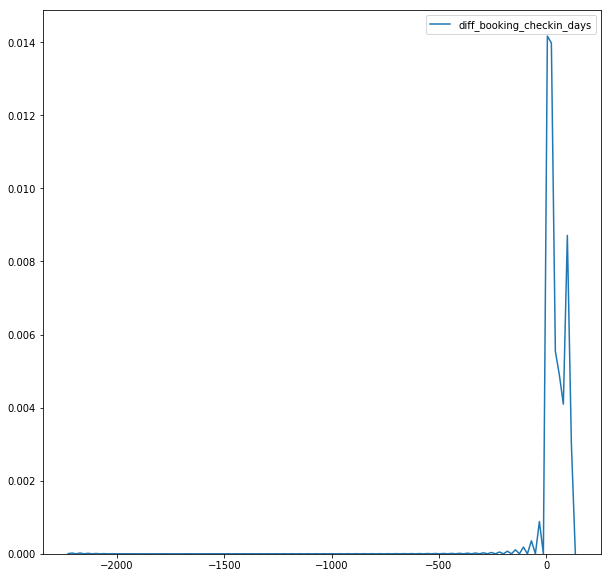

In [72]:
plt.subplots(figsize=(10,10))
sns.kdeplot(train['diff_booking_checkin_days'])

In [0]:
x=train['diff_booking_checkin_days'].value_counts() >5

In [0]:
# xm = train['diff_booking_checkin_days'].sort_values().unique()

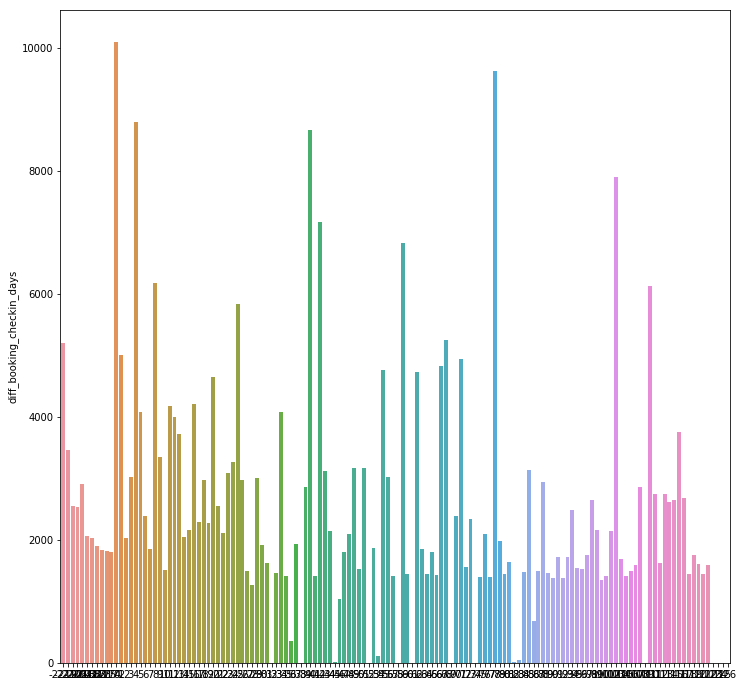

In [75]:

fig,ax=plt.subplots(figsize=(12,12))

fig=sns.barplot(train['diff_booking_checkin_days'].unique(),train['diff_booking_checkin_days'].value_counts(),ax=ax)

# xm = train['diff_booking_checkin_days'].sort_values().unique()
# ax.set_xticklabels(labels=xm, rotation=45, ha='right')

In [76]:
train[train['diff_booking_checkin_days']<0]

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset,season_holidayed_code_new,diff_booking_checkin_days
15,15,821a5e5313029b1bbec6ec738a1b34d6d14c82fca97c47...,2018-04-05,2012-03-08,2012-03-11,3,1,2,0,45,...,3,0,2012,11,3,6,1,train,3.0,-2219
34,34,a80d2fbea1195021307a13a44642855c60f46145dcf29c...,2018-03-31,2012-03-12,2012-03-18,3,2,3,0,45,...,0,0,2012,18,3,6,1,train,2.0,-2210
60,60,51fe7242f55c79aacb499f957c746445ccb51de3c8d206...,2018-04-05,2012-03-24,2012-03-25,3,2,2,0,45,...,5,1,2012,25,3,6,1,train,2.0,-2203
79,79,548605b68da37dd5c8555a37650910ce9f110e793b4619...,2018-04-05,2012-03-21,2012-03-25,1,3,3,1,45,...,2,0,2012,25,3,6,1,train,2.0,-2206
81,81,3ac8796577c899cd0177b6f9638515e4feab55d8a72b8b...,2018-04-05,2012-03-23,2012-03-26,1,3,4,0,45,...,4,0,2012,26,3,0,0,train,2.0,-2204
113,113,4d73a3304416c4bff78b47c6b307a07568d7286d946e3e...,2018-04-06,2012-04-09,2012-04-11,1,2,3,1,45,...,0,0,2012,11,4,2,0,train,3.0,-2188
116,116,8e7c40db97f7088ea2249bb9da85b1cfce31c8b537dcfa...,2018-04-06,2012-04-14,2012-04-15,1,3,4,0,45,...,5,1,2012,15,4,6,1,train,3.0,-2183
129,129,085264337c2af42038a81b4ec4d9e278d9699e5662d404...,2018-04-06,2012-04-19,2012-04-21,3,1,2,0,45,...,3,0,2012,21,4,5,1,train,2.0,-2178
130,130,7294817a3becfb22650a6e4cf0dd7d2a3a1a3969e1e01d...,2018-04-06,2012-04-19,2012-04-21,3,1,2,0,45,...,3,0,2012,21,4,5,1,train,2.0,-2178
147,147,e36df886dd8222cad63291754719419d5ff50b44e525e0...,2018-04-06,2012-04-22,2012-04-26,3,3,4,0,45,...,6,1,2012,26,4,3,0,train,3.0,-2175


In [77]:
test[test['diff_booking_checkin_days']<0]

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,amount_spent_per_room_night_scaled,dataset,season_holidayed_code_new,diff_booking_checkin_days
41,41,6ec2dd92d278aa97f8ab095ac0c0d18a7e9f18753c51c7...,2018-04-06,2012-04-20,2012-04-24,3,3,2,0,4752,...,0,2012,24,4,1,0,0,test,3.0,-2177
57,57,54bf09a310761d2f874666557e3706012d85a47b14d0b8...,2018-04-06,2012-04-28,2012-05-01,3,1,3,0,45,...,1,2012,1,5,1,0,0,test,2.0,-2169


There are totally 14 rows, where the booking dat is much later than the check in data. In such cases, we can create a new column to indicate this anamoly and make the booking fate same as the booking date - in the 2nd iteration

In [0]:
train['days_of_stay']=train.apply(lambda row:diffbetweenDate(row['checkout_date'],row['checkin_date']),axis=1)

In [0]:
test['days_of_stay']=test.apply(lambda row:diffbetweenDate(row['checkout_date'],row['checkin_date']),axis=1)


In [80]:
train.shape


(341424, 44)

In [81]:
data=pd.concat([train,test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [82]:
data.head()

,Unnamed: 0,amount_spent_per_room_night_scaled,booking_date,booking_date_day,booking_date_dayofweek,booking_date_isweekend,booking_date_month,booking_date_year,booking_type_code,channel_code,...,resort_id,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,season_holidayed_code_new,state_code_residence,state_code_resort,total_pax
0,0,7.706428,2018-04-05,5,3,0,4,2018,1,3,...,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,3,3,3,1,2.0,2.0,7.0,3,3
1,1,6.662563,2015-01-23,23,4,0,1,2015,1,1,...,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,3,3,4,5,2.0,2.0,7.0,5,2
2,2,7.871602,2015-01-28,28,2,0,1,2015,1,1,...,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,1,5,4,4,2.0,2.0,7.0,1,2
3,3,5.344943,2015-05-02,2,5,1,5,2015,1,1,...,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2,2,3,5,2.0,2.0,7.0,2,2
4,4,7.059346,2015-09-02,2,2,0,9,2015,1,1,...,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2,2,4,5,2.0,2.0,7.0,2,2


In [83]:
data.shape

(488189, 44)

In [0]:
member_first_booking=data.groupby(['memberid'])['booking_date'].min().reset_index().rename(columns={'booking_date':'first_booking_date'})


In [85]:
member_first_booking

,memberid,first_booking_date
0,00005d44634de09d36aaa5ccb20b67223ec9406c532335...,2016-09-01
1,0000a957d528a2df1dc9ed2314bc009e8666e75a2d6c23...,2015-02-26
2,00016645b88d51f9c30ce4c1338178125aef1e37111667...,2017-05-24
3,00016b96386f53adf2ea4beee032a8793e66e6ddd0ed28...,2017-05-13
4,000196f8748cdf3aa04023b2490dd29bb8b127e50a86f5...,2016-09-01
5,00021328914515303c6992143d1f0bedaf1564dc607b72...,2015-12-18
6,000218e18abc5d2e73212e064983cd4433f7969fd908a6...,2015-07-02
7,0002f0156e1f9944885df03fbdf079c662a1755ef4c6df...,2016-08-27
8,00039767c3d802b128ce0c2c4b221bd4bc05ed226e0924...,2017-09-01
9,00039cd39165d76e08cbba78b9dd595cbd2f22e3b98377...,2015-12-23


In [0]:
train=pd.merge(train,member_first_booking,on="memberid",how='left')


In [0]:
test=pd.merge(test,member_first_booking,on="memberid",how='left')


In [88]:
train.head()

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset,season_holidayed_code_new,diff_booking_checkin_days,days_of_stay,first_booking_date
0,0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,...,2018,6,4,4,0,train,2.0,0,1,2015-01-23
1,1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,...,2015,16,4,3,0,train,2.0,78,5,2015-01-23
2,2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,...,2015,5,2,3,0,train,2.0,4,4,2015-01-23
3,3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,...,2015,16,6,1,0,train,2.0,40,5,2015-01-23
4,4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,...,2015,19,12,5,1,train,2.0,103,5,2015-01-23


In [0]:
train['is_first_booking']=train.apply(lambda row:1 if row['booking_date']==row['first_booking_date'] else 0,axis=1)
test['is_first_booking']=test.apply(lambda row:1 if row['booking_date']==row['first_booking_date'] else 0,axis=1)

In [90]:
train.shape

(341424, 46)

## What is the total number of visitors?

In [0]:
train['total_visitors']=train['numberofadults'] + train['numberofchildren']


In [0]:
test['total_visitors']=test['numberofadults'] + test['numberofchildren']


## What is the ratio of total_pax to total_visitors?

In [0]:
train['visitors_pax_ratio']=train['total_visitors']/train['total_pax']
test['visitors_pax_ratio']=test['total_visitors']/test['total_pax']

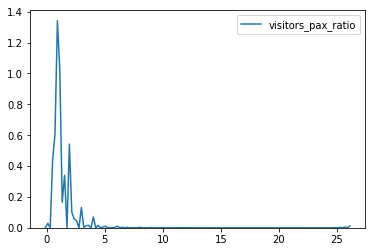

In [94]:
sns.kdeplot(train['visitors_pax_ratio'])

Text(0.5, 0, 'unique visitor value')

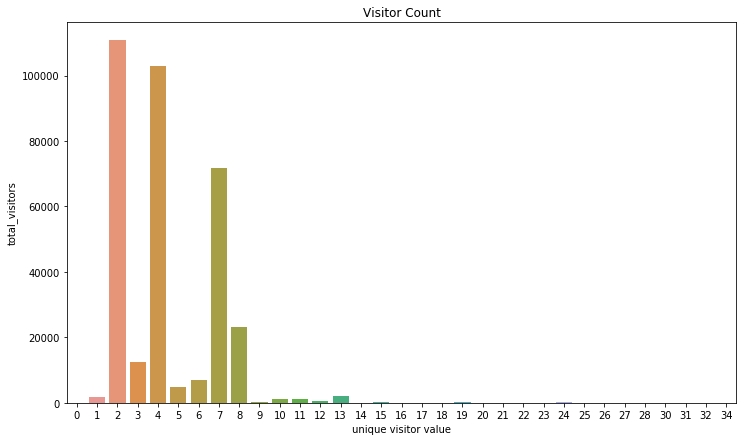

In [95]:
fig,ax=plt.subplots(figsize=(12,7))
fig=sns.barplot(train['total_visitors'].unique(),train['total_visitors'].value_counts()).set_title('Visitor Count')
plt.xlabel('unique visitor value')


## Is the resort state same as the member state

In [0]:
train['is_resort_state_same_member_state']=train.apply(lambda row:1 if row['state_code_resort']==row['state_code_residence'] else 0,axis=1)


In [0]:
test['is_resort_state_same_member_state']=test.apply(lambda row:1 if row['state_code_resort']==row['state_code_residence'] else 0,axis=1)


## On a particular checkin date, how many reservations a resort has

In [0]:
num_reservations=data.groupby(['checkin_date'])['reservation_id'].count().reset_index().rename(columns={'reservation_id':'num_reservations_resort_on_that_day'})


In [99]:
num_reservations


,checkin_date,num_reservations_resort_on_that_day
0,2012-03-08,1
1,2012-03-12,1
2,2012-03-21,1
3,2012-03-23,1
4,2012-03-24,1
5,2012-04-09,1
6,2012-04-14,1
7,2012-04-19,2
8,2012-04-20,1
9,2012-04-22,1


In [0]:
train=pd.merge(train,num_reservations,on='checkin_date',how='left')


In [0]:
test=pd.merge(test,num_reservations,on='checkin_date',how='left')


In [102]:
train.head()

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,dataset,season_holidayed_code_new,diff_booking_checkin_days,days_of_stay,first_booking_date,is_first_booking,total_visitors,visitors_pax_ratio,is_resort_state_same_member_state,num_reservations_resort_on_that_day
0,0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,...,train,2.0,0,1,2015-01-23,0,2,0.666667,0,330
1,1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,...,train,2.0,78,5,2015-01-23,1,2,1.000000,0,394
2,2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,...,train,2.0,4,4,2015-01-23,0,2,1.000000,0,272
3,3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,...,train,2.0,40,5,2015-01-23,0,4,2.000000,0,274
4,4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,...,train,2.0,103,5,2015-01-23,0,2,1.000000,0,270


In [103]:
train.shape

(341424, 50)

## How many different resorts a member has booked??

In [0]:
num_resorts_booked=data.groupby(['memberid'])['resort_id'].nunique().reset_index().rename(columns={'resort_id':'num_unique_resorts_booked_by_member'})


In [0]:

train=pd.merge(train,num_resorts_booked,on='memberid',how='left')
test=pd.merge(test,num_resorts_booked,on='memberid',how='left')

In [106]:
train.columns

Index(['Unnamed: 0', 'reservation_id', 'booking_date', 'checkin_date',
       'checkout_date', 'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'booking_date_year',
       'booking_date_day', 'booking_date_month', 'booking_date_dayofweek',
       'booking_date_isweekend', 'checkin_date_year', 'checkin_date_day',
       'checkin_date_month', 'checkin_date_dayofweek',
       'checkin_date_isweekend', 'checkout_date_year', 'checkout_date_day',
       'checkout_date_month', 'checkout_date_dayofweek',
       'checkout_date_isweekend', 'dataset', 'season_holidayed_code_new',
       'diff_booking

In [107]:
train['reservationstatusid_code'].value_counts()


A    312481
B     14811
C     14131
D         1
Name: reservationstatusid_code, dtype: int64

In [108]:
test['reservationstatusid_code'].value_counts()


A    134262
B      6429
C      6074
Name: reservationstatusid_code, dtype: int64

We can drop row with reservationstatusid_code= D from the datset as it has only one value.

In [109]:
train=train[train['reservationstatusid_code']!='D']
train.shape

(341423, 51)

## Number of resorts in the region?

In [0]:
num_resorts_region=data.groupby(['resort_region_code'])['resort_id'].nunique().reset_index().rename(columns={'resort_id':
                                                                                                           'num_resorts_region'})

In [0]:
train=pd.merge(train,num_resorts_region,on='resort_region_code',how='left')


In [0]:
test=pd.merge(test,num_resorts_region,on='resort_region_code',how='left')


## Number of resorts booked on a particular checkin date?

In [0]:
num_resorts_booked=data.groupby(['resort_region_code','checkin_date'])['resort_id'].nunique().reset_index().rename(columns={'resort_id':'num_resorts_booked'})


In [0]:
train=pd.merge(train,num_resorts_booked,on=['resort_region_code','checkin_date'],how='left')


In [0]:
test=pd.merge(test,num_resorts_booked,on=['resort_region_code','checkin_date'],how='left')


In [116]:
test.shape


(146765, 53)

In [117]:
train.head()

,Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,...,days_of_stay,first_booking_date,is_first_booking,total_visitors,visitors_pax_ratio,is_resort_state_same_member_state,num_reservations_resort_on_that_day,num_unique_resorts_booked_by_member,num_resorts_region,num_resorts_booked
0,0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,...,1,2015-01-23,0,2,0.666667,0,330,10,10,10
1,1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,...,5,2015-01-23,1,2,1.000000,0,394,10,10,8
2,2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,...,4,2015-01-23,0,2,1.000000,0,272,10,12,9
3,3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,...,5,2015-01-23,0,4,2.000000,0,274,10,10,7
4,4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,...,5,2015-01-23,0,2,1.000000,0,270,10,10,7


In [118]:
test.shape

(146765, 53)

In [119]:
train.shape

(341423, 53)

In [120]:
test.columns

Index(['Unnamed: 0', 'reservation_id', 'booking_date', 'checkin_date',
       'checkout_date', 'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'booking_date_year', 'booking_date_day', 'booking_date_month',
       'booking_date_dayofweek', 'booking_date_isweekend', 'checkin_date_year',
       'checkin_date_day', 'checkin_date_month', 'checkin_date_dayofweek',
       'checkin_date_isweekend', 'checkout_date_year', 'checkout_date_day',
       'checkout_date_month', 'checkout_date_dayofweek',
       'checkout_date_isweekend', 'amount_spent_per_room_night_scaled',
       'dataset', 'season_holidayed_code_new', 'diff_booking_checki

In [121]:
train.columns

Index(['Unnamed: 0', 'reservation_id', 'booking_date', 'checkin_date',
       'checkout_date', 'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'booking_date_year',
       'booking_date_day', 'booking_date_month', 'booking_date_dayofweek',
       'booking_date_isweekend', 'checkin_date_year', 'checkin_date_day',
       'checkin_date_month', 'checkin_date_dayofweek',
       'checkin_date_isweekend', 'checkout_date_year', 'checkout_date_day',
       'checkout_date_month', 'checkout_date_dayofweek',
       'checkout_date_isweekend', 'dataset', 'season_holidayed_code_new',
       'diff_booking

In [141]:
train.head()

Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_date_year,booking_date_day,booking_date_month,booking_date_dayofweek,booking_date_isweekend,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset,season_holidayed_code_new,diff_booking_checkin_days,days_of_stay,first_booking_date,is_first_booking,total_visitors,visitors_pax_ratio,is_resort_state_same_member_state,num_reservations_resort_on_that_day,num_unique_resorts_booked_by_member,num_resorts_region,num_resorts_booked
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b752eebc9b50313e152,2018-04-05 00:00:00,2018-04-05 00:00:00,2018-04-06 00:00:00,3,1,2,0,46,3,3,3,1,2,7,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce,7.70643,2018,5,4,3,0,2018,5,4,3,0,2018,6,4,4,0,train,2,0,1,2015-01-23 00:00:00,0,2,0.666667,0,330,10,10,10
1,03930f033646d073462b35d411616323597715ac4fc3982021ff25387177a782,2015-01-23 00:00:00,2015-04-11 00:00:00,2015-04-16 00:00:00,1,1,2,0,46,3,3,4,5,2,7,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9,6.66256,2015,23,1,4,0,2015,11,4,5,1,2015,16,4,3,0,train,2,78,5,2015-01-23 00:00:00,1,2,1,0,394,10,10,8
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf11ea2bb87c4b0100a4,2015-01-28 00:00:00,2015-02-01 00:00:00,2015-02-05 00:00:00,1,1,2,0,47,1,5,4,4,2,7,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790,7.8716,2015,28,1,2,0,2015,1,2,6,1,2015,5,2,3,0,train,2,4,4,2015-01-23 00:00:00,0,2,1,0,272,10,12,9
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04782dcd41548b3974b5,2015-05-02 00:00:00,2015-06-11 00:00:00,2015-06-16 00:00:00,1,1,2,2,46,2,2,3,5,2,7,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,5.34494,2015,2,5,5,1,2015,11,6,3,0,2015,16,6,1,0,train,2,40,5,2015-01-23 00:00:00,0,4,2,0,274,10,10,7
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb294ba12c85962b0a9842,2015-09-02 00:00:00,2015-12-14 00:00:00,2015-12-19 00:00:00,1,1,2,0,46,2,2,4,5,2,7,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,7.05935,2015,2,9,2,0,2015,14,12,0,0,2015,19,12,5,1,train,2,103,5,2015-01-23 00:00:00,0,2,1,0,270,10,10,7
5,cc8f05558362b7589004e57044e8b558bd228fc70da5b0472ff446c520235959,2015-12-01 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,1,1,2,0,47,1,1,4,2,2,7,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9,8.16771,2015,1,12,1,0,2016,12,1,1,0,2016,13,1,2,0,train,2,42,1,2015-01-23 00:00:00,0,2,1,0,268,10,12,11
6,6827da5d76c626deeed81eb9f3afef635db4c17c9cbea0144a833ac3b4d59cdc,2016-01-20 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,3,1,2,0,46,2,7,4,1,3,7,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,B,A,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a,6.44984,2016,20,1,2,0,2016,20,1,2,0,2016,21,1,3,0,train,3,0,1,2015-01-23 00:00:00,0,2,2,0,204,10,10,7
7,b89547398bfff6b8e99939fbeb20ddb55aa2e43ebce9e448fb26cb4382ce9f73,2016-08-22 00:00:00,2016-10-20 00:00:00,2016-10-25 00:00:00,1,1,2,2,46,1,1,2,5,3,7,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,

# Lets save this while processed data in a new csv file

In [0]:
train.to_csv("Train_Preprocessed_version2.csv",index=False)
test.to_csv("Test_Preprocessed_version2.csv",index=False)

In [123]:
! pip install h2o

     |████████████████████████████████| 121.8MB 301kB/s 
  Stored in directory: /root/.cache/pip/wheels/36/73/57/2ea67a8a35ea9114f7d66cc8c5ec46c915698c909321f8a17d
Successfully built h2o


In [0]:
import h2o
from h2o.automl import H2OAutoML


In [125]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3); OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpaziw0wo1
  JVM stdout: /tmp/tmpaziw0wo1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpaziw0wo1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_unknownUser_uagzl1
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [126]:
train=h2o.import_file("Train_Preprocessed_version2.csv")
test=h2o.import_file("Test_Preprocessed_version2.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
x = train.columns
y = "amount_spent_per_room_night_scaled"
x.remove(y)
x.remove('dataset')
x.remove('reservation_id')
x.remove('memberid')
x.remove('season_holidayed_code')

In [0]:

code_cols = ['channel_code','main_product_code','persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'season_holidayed_code_new', 'state_code_residence', 'state_code_resort',
             'booking_type_code'
            ]

In [0]:
for col in code_cols:
    train[col] = train[col].asfactor()

In [147]:
train[code_cols].head()

channel_code,main_product_code,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,season_holidayed_code_new,state_code_residence,state_code_resort,booking_type_code
3,1,46,3,3,3,2,7,3,1
1,1,46,3,3,4,2,7,5,1
1,1,47,1,5,4,2,7,1,1
1,1,46,2,2,3,2,7,2,1
1,1,46,2,2,4,2,7,2,1
1,1,47,1,1,4,2,7,6,1
3,1,46,2,7,4,3,7,9,1
1,1,46,1,1,2,3,7,6,1
1,1,45,2,4,3,4,7,10,1
1,1,45,1,5,4,3,7,1,1


In [148]:
train.head()

Unnamed: 0,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_date_year,booking_date_day,booking_date_month,booking_date_dayofweek,booking_date_isweekend,checkin_date_year,checkin_date_day,checkin_date_month,checkin_date_dayofweek,checkin_date_isweekend,checkout_date_year,checkout_date_day,checkout_date_month,checkout_date_dayofweek,checkout_date_isweekend,dataset,season_holidayed_code_new,diff_booking_checkin_days,days_of_stay,first_booking_date,is_first_booking,total_visitors,visitors_pax_ratio,is_resort_state_same_member_state,num_reservations_resort_on_that_day,num_unique_resorts_booked_by_member,num_resorts_region,num_resorts_booked
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b752eebc9b50313e152,2018-04-05 00:00:00,2018-04-05 00:00:00,2018-04-06 00:00:00,3,1,2,0,46,3,3,3,1,2,7,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce,7.70643,2018,5,4,3,0,2018,5,4,3,0,2018,6,4,4,0,train,2,0,1,2015-01-23 00:00:00,0,2,0.666667,0,330,10,10,10
1,03930f033646d073462b35d411616323597715ac4fc3982021ff25387177a782,2015-01-23 00:00:00,2015-04-11 00:00:00,2015-04-16 00:00:00,1,1,2,0,46,3,3,4,5,2,7,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9,6.66256,2015,23,1,4,0,2015,11,4,5,1,2015,16,4,3,0,train,2,78,5,2015-01-23 00:00:00,1,2,1,0,394,10,10,8
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf11ea2bb87c4b0100a4,2015-01-28 00:00:00,2015-02-01 00:00:00,2015-02-05 00:00:00,1,1,2,0,47,1,5,4,4,2,7,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790,7.8716,2015,28,1,2,0,2015,1,2,6,1,2015,5,2,3,0,train,2,4,4,2015-01-23 00:00:00,0,2,1,0,272,10,12,9
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04782dcd41548b3974b5,2015-05-02 00:00:00,2015-06-11 00:00:00,2015-06-16 00:00:00,1,1,2,2,46,2,2,3,5,2,7,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,5.34494,2015,2,5,5,1,2015,11,6,3,0,2015,16,6,1,0,train,2,40,5,2015-01-23 00:00:00,0,4,2,0,274,10,10,7
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb294ba12c85962b0a9842,2015-09-02 00:00:00,2015-12-14 00:00:00,2015-12-19 00:00:00,1,1,2,0,46,2,2,4,5,2,7,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,7.05935,2015,2,9,2,0,2015,14,12,0,0,2015,19,12,5,1,train,2,103,5,2015-01-23 00:00:00,0,2,1,0,270,10,10,7
5,cc8f05558362b7589004e57044e8b558bd228fc70da5b0472ff446c520235959,2015-12-01 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,1,1,2,0,47,1,1,4,2,2,7,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9,8.16771,2015,1,12,1,0,2016,12,1,1,0,2016,13,1,2,0,train,2,42,1,2015-01-23 00:00:00,0,2,1,0,268,10,12,11
6,6827da5d76c626deeed81eb9f3afef635db4c17c9cbea0144a833ac3b4d59cdc,2016-01-20 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,3,1,2,0,46,2,7,4,1,3,7,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,B,A,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a,6.44984,2016,20,1,2,0,2016,20,1,2,0,2016,21,1,3,0,train,3,0,1,2015-01-23 00:00:00,0,2,2,0,204,10,10,7
7,b89547398bfff6b8e99939fbeb20ddb55aa2e43ebce9e448fb26cb4382ce9f73,2016-08-22 00:00:00,2016-10-20 00:00:00,2016-10-25 00:00:00,1,1,2,2,46,1,1,2,5,3,7,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,

In [130]:
aml = H2OAutoML(max_models=30, seed=42,max_runtime_secs=7200,project_name="ClubMahindra_Version2",max_runtime_secs_per_model=400)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [132]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190508_092734,0.958729,0.979147,0.958729,0.717336,0.126409
StackedEnsemble_BestOfFamily_AutoML_20190508_092734,0.960638,0.980121,0.960638,0.718422,0.126522
GBM_1_AutoML_20190508_092734,0.964646,0.982164,0.964646,0.720682,0.126742
GBM_2_AutoML_20190508_092734,0.96519,0.982441,0.96519,0.720858,0.126771
GBM_3_AutoML_20190508_092734,0.965868,0.982786,0.965868,0.720991,0.126799
DeepLearning_1_AutoML_20190508_092734,0.970623,0.985202,0.970623,0.720101,0.127184
GBM_4_AutoML_20190508_092734,0.970679,0.98523,0.970679,0.722945,0.127035
GBM_5_AutoML_20190508_092734,0.978446,0.989164,0.978446,0.727061,0.127491
GLM_grid_1_AutoML_20190508_092734_model_1,0.994703,0.997348,0.994703,0.733024,0.128342
DeepLearning_grid_1_AutoML_20190508_092734_model_1,0.999272,0.999636,0.999272,0.736334,0.128567


In [0]:
# aml.leader

In [133]:
h2o.save_model(aml.leader, path = "Best_AutoModel_v2")

'/content/Best_AutoModel_v2/StackedEnsemble_AllModels_AutoML_20190508_092734'

In [0]:
for col in code_cols:
    test[col] = test[col].asfactor()

In [135]:
preds=aml.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [0]:
submission=pd.read_csv("sample_submission.csv")


In [0]:
preds=preds.as_data_frame()


In [0]:
submission['amount_spent_per_room_night_scaled']=preds['predict']


In [0]:
submission.to_csv("Best_AutoML_v2.csv",index=False)
